<a href="https://colab.research.google.com/github/egorik3z/ML/blob/master/ML11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Импорт необходимых модулей 
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Настройки для визуализации
# Если используется темная тема - лучше текст сделать белым
TEXT_COLOR = 'black'

matplotlib.rcParams['figure.figsize'] = (15, 10)
matplotlib.rcParams['text.color'] = 'black'
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['axes.labelcolor'] = TEXT_COLOR
matplotlib.rcParams['xtick.color'] = TEXT_COLOR
matplotlib.rcParams['ytick.color'] = TEXT_COLOR

# Зафиксируем состояние случайных чисел
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

# Линейная регрессия
Это наша первая практика, в которой мы коснемся вопросов, связанных с машинным обучением. Запомните, в машинном обучении данные - всему голова! Поэтому создадим немного данных, чтобы на них разбираться.

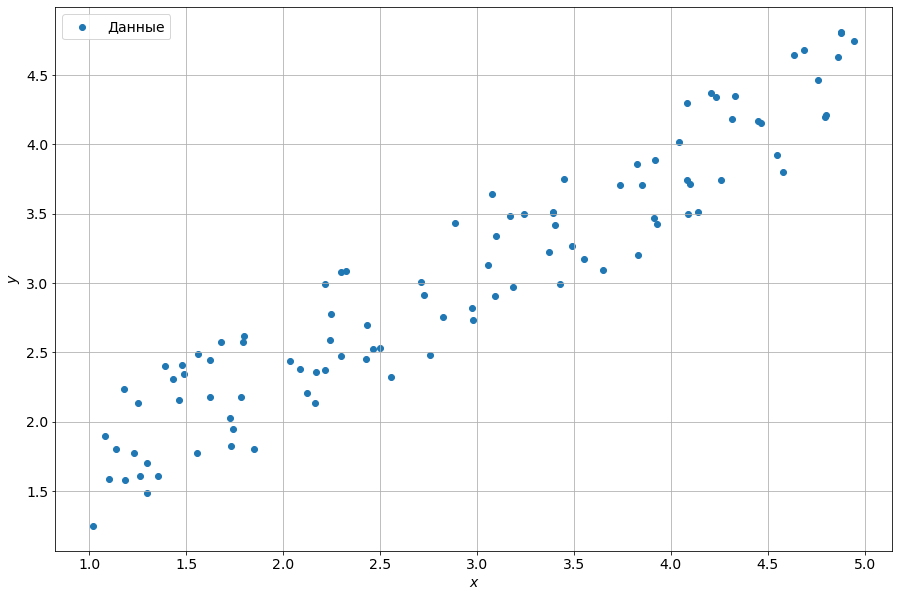

In [2]:
n_points = 100

real_W = [1, 0.7]
X_data = 4*np.sort(np.random.rand(n_points, 1), axis=0)+1
noize = 1*(np.random.rand(n_points, 1)-0.5)
y_data_true = real_W[0] + real_W[1]*X_data
y_data_noized = y_data_true + noize
y_data = y_data_noized[:, 0]

X_render = np.linspace(X_data[:, 0].min(), X_data[:, 0].max(), 100)
y_render = real_W[0] + real_W[1]*X_render

plt.scatter(X_data, y_data_noized, label='Данные')
plt.ylabel('$y$')
plt.xlabel('$x$')
plt.grid()
plt.legend()

В виде таблицы это бы выглядело вот так:

In [ ]:
pd.DataFrame({
    'quality': X_data[:,0],
    'price': y_data
}).head()

,quality,price
0,1.022088,1.246891
1,1.082338,1.894047
2,1.101677,1.585530
3,1.137554,1.804859
4,1.180909,2.234203


Что если попробуем провести две прямых линии через эти данные? Пробуем!

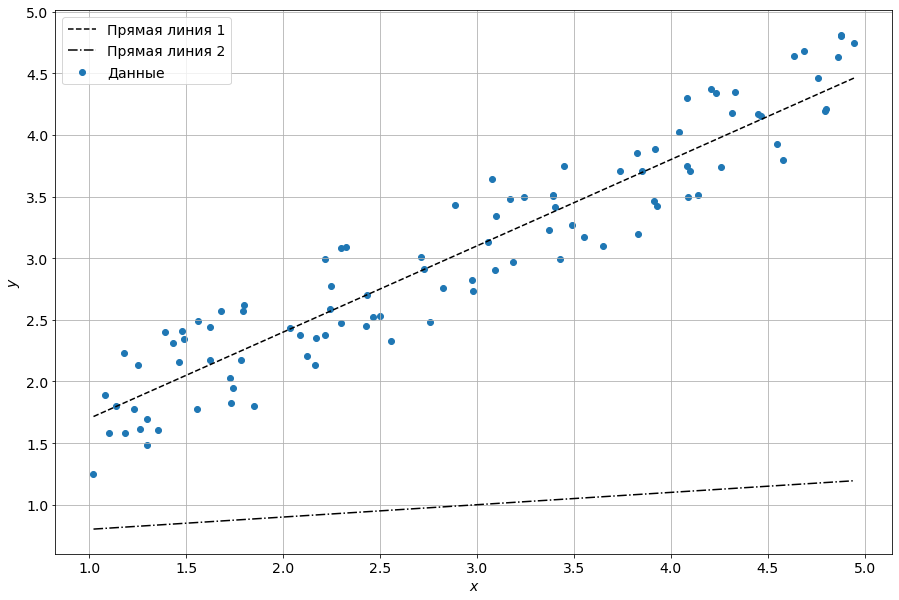

In [ ]:
X_render = np.linspace(X_data[:, 0].min(), X_data[:, 0].max(), 100)
y1 = real_W[0] + real_W[1]*X_render
y2 = 0.7 + 0.1*X_render

plt.scatter(X_data, y_data_noized, label='Данные')
plt.plot(X_render, y1, 'k--', label='Прямая линия 1')
plt.plot(X_render, y2, 'k-.', label='Прямая линия 2')
plt.ylabel('$y$')
plt.xlabel('$x$')
plt.grid()
plt.legend()

# Let`s get our hands dirty! (Начнем практиковаться)

In [3]:
X_data.shape, y_data.shape

((100, 1), (100,))

In [4]:
X_data[:3]


array([[1.02208847],
       [1.08233798],
       [1.10167651]])

In [5]:
y_data[:3]


array([1.24689111, 1.894047  , 1.58552954])

Для начала, нашей задачей является написать реализацию функции предсказания модели. Начнем мы со скалярного представления:

Напомним, $\hat{y} = w_0 + w*x$

In [6]:
def predict_scalar_one(x, w0, w1):
    '''
    x - скалярное значение признака
    w0 - константное смещение
    w1 - вес признака
    '''
    y=w0+w1*x
    return y

In [7]:
# TEST

# В таких проверочных блоках будет проверяться корректность
#   написания вами кода, так что если в блоке выпадает ошибка - не пугайтесь,
#   просто, вероятно, код делает не совсем правильные вещи

# assert - ключевое слово Python
#   если ему передан True - он просто ничего не делает
#   если False - то он выдаст ошибку AssertionError, 
#                   что означает проверка не пройдена

x = 1
w0 = 2
w1 = 3

assert predict_scalar_one(x, w0, w1) == 5

In [8]:

data_index = 0

x = X_data[data_index, 0]
y_true = y_data[data_index]
# Зададим для примера следующие веса
w0 = 3
w1 = 0.2

y_pred_sc = predict_scalar_one(x, w0, w1)
print(f'y_pred_sc = predict_scalar({x}, {w0}, {w1}) = {y_pred_sc}')
print(f'y_true = {y_true}')

y_pred_sc = predict_scalar(1.0220884684944096, 3, 0.2) = 3.2044176936988817
y_true = 1.2468911136328207


Напишите функцию предсказания для вектора признаков (одной записи в данных):

Не забудьте, что на выходе мы должны получить скалярное значение, а не массив

In [9]:
def predict_one(X, W):
    '''
    X - вектор признаков [M]
    W - вектор весов [M+1]
    '''
    X=np.concatenate((np.ones((1),int),X))
    y=W@X
    return y

In [10]:
# TEST

# Запись в данных имеет, например, три [M = 3] признака
X = np.array([1, 2, 0])
# Веса модели [M+1]
W = np.array([3, 2, 1, 1])
y_pred = predict_one(X, W)
assert not isinstance(y_pred, (list, tuple, np.ndarray))
assert y_pred == 7

In [11]:
# Вектор наших случайно выбранных весов
selected_W = np.array([w0, w1])
X = X_data[data_index]
y_pred_one = predict_one(X, selected_W)
print(f'y_pred = predict_one({X}, {selected_W}) = {y_pred_one}')

y_pred = predict_one([1.02208847], [3.  0.2]) = 3.2044176936988817


In [12]:
assert y_pred_sc==y_pred_one


In [16]:
def predict(X, W):
    '''
    X - 2D матрица признаков [N, M]
    W - вектор весов [M+1]
    '''
    X=np.concatenate((np.ones((X.shape[0],1),int),X),axis=1)
    y=X@W
    return y
    # TODO - напишите функцию предсказания


In [17]:
X = np.array([
    [1, 2, 3],
    [2, 3, 4],
    [3, 4, 5]
])
W = np.array([3, 2, 1, 2])

y_pred = predict(X, W)

assert np.all(y_pred == np.array([13, 18, 23]))
assert len(y_pred.shape) == 1
assert y_pred.shape[0] == 3

Теперь достанем часть данных и сделаем предсказание в цикле векторной функцией и сравним с нашей матричной реализацией:

In [18]:
data_len = 10

X = X_data[10:10+data_len]
y_true = y_data[10:10+data_len]
X


array([[1.29820257],
       [1.35397001],
       [1.39068846],
       [1.43156571],
       [1.46347624],
       [1.47837698],
       [1.48815294],
       [1.55797544],
       [1.5636969 ],
       [1.62397808]])

In [19]:
# Для случая нескольких записей при работе без матриц придется проходить
#   циклом по каждой записи
y_pred_sc = []
for x in X:
    y = predict_one(x, selected_W)
    y_pred_sc.append(y)

y_pred_sc = np.array(y_pred_sc)

In [20]:
y_pred_sc

array([3.25964051, 3.270794  , 3.27813769, 3.28631314, 3.29269525,
       3.2956754 , 3.29763059, 3.31159509, 3.31273938, 3.32479562])

In [21]:
y_pred = predict(X, selected_W)

In [22]:
y_pred


array([3.25964051, 3.270794  , 3.27813769, 3.28631314, 3.29269525,
       3.2956754 , 3.29763059, 3.31159509, 3.31273938, 3.32479562])

In [23]:
print(f'ys_pred == ys_pred_sc -> {np.all(y_pred_sc==y_pred)}')


ys_pred == ys_pred_sc -> True


# Визуализация предсказаний¶

In [24]:
def plot_model(X, y_pred, y_true):
    plt.scatter(X, y_data, label='Данные')
    plt.plot(X, y_pred, 'k--', label='Предсказание модели')
    plt.ylabel('$Y$')
    plt.xlabel('$X$')
    plt.grid()
    plt.legend()
    plt.show()

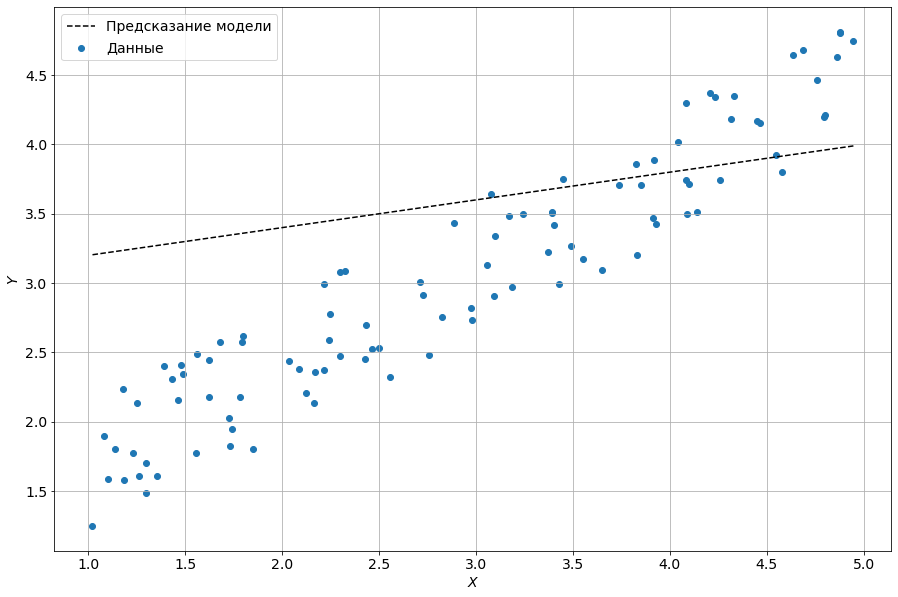

In [25]:
y_pred = predict(X_data, selected_W)
plot_model(X_data, y_pred, y_data)

# Метрики

In [26]:
def rmse_score(y_true, y_pred):
    '''
    y_true - вектор истинных значений
    y_pred - вектор предсказанных значений
    '''
    rmse_value=np.sqrt((np.sum((y_pred-y_true)**2))/y_pred.shape[0])
    return rmse_value
    # TODO - напишите функцию вычисления RMSE

def mae_score(y_true, y_pred):
    '''
    y_true - вектор истинных значений
    y_pred - вектор предсказанных значений
    '''
    mae_value=np.sum(np.abs(y_pred-y_true))/y_pred.shape[0]
    return mae_value
    # TODO - напишите функцию вычисления MAE


In [27]:
# TEST
y_true = np.array([0.5, 0.1, -0.4, 1.2])
y_pred = np.array([0.2, 0.0, -0.1, 3.1])

rmse_value = rmse_score(y_true, y_pred)
mae_value = mae_score(y_true, y_pred)

assert np.isclose(rmse_value, 0.974679)
assert np.isclose(mae_value, 0.65)

In [28]:
y_true = y_data
X = X_data
y_pred = predict(X, selected_W)

rmse_value = rmse_score(y_true, y_pred)
mae_value = mae_score(y_true, y_pred)

rmse_value, mae_value

(0.8822495430466523, 0.7395733955141036)

# Функция потерь¶

In [29]:
def loss_function(y_true, y_pred):
    '''
    y_true - вектор истинных значений
    y_pred - вектор предсказанных значений
    '''
    loss=np.sum((y_pred-y_true)**2)/y_pred.shape[0]/2
    return loss
    # TODO - напишите реализацию функции потерь


In [30]:
# TEST
y_true = np.array([0.5, 0.1, -0.4, 1.2])
y_pred = np.array([0.2, 0.0, -0.1, 3.1])

rmse_value = rmse_score(y_true, y_pred)
loss_value = loss_function(y_true, y_pred)

assert np.isclose(loss_value, rmse_value**2/2)

Соответственно, проверим наши данные:

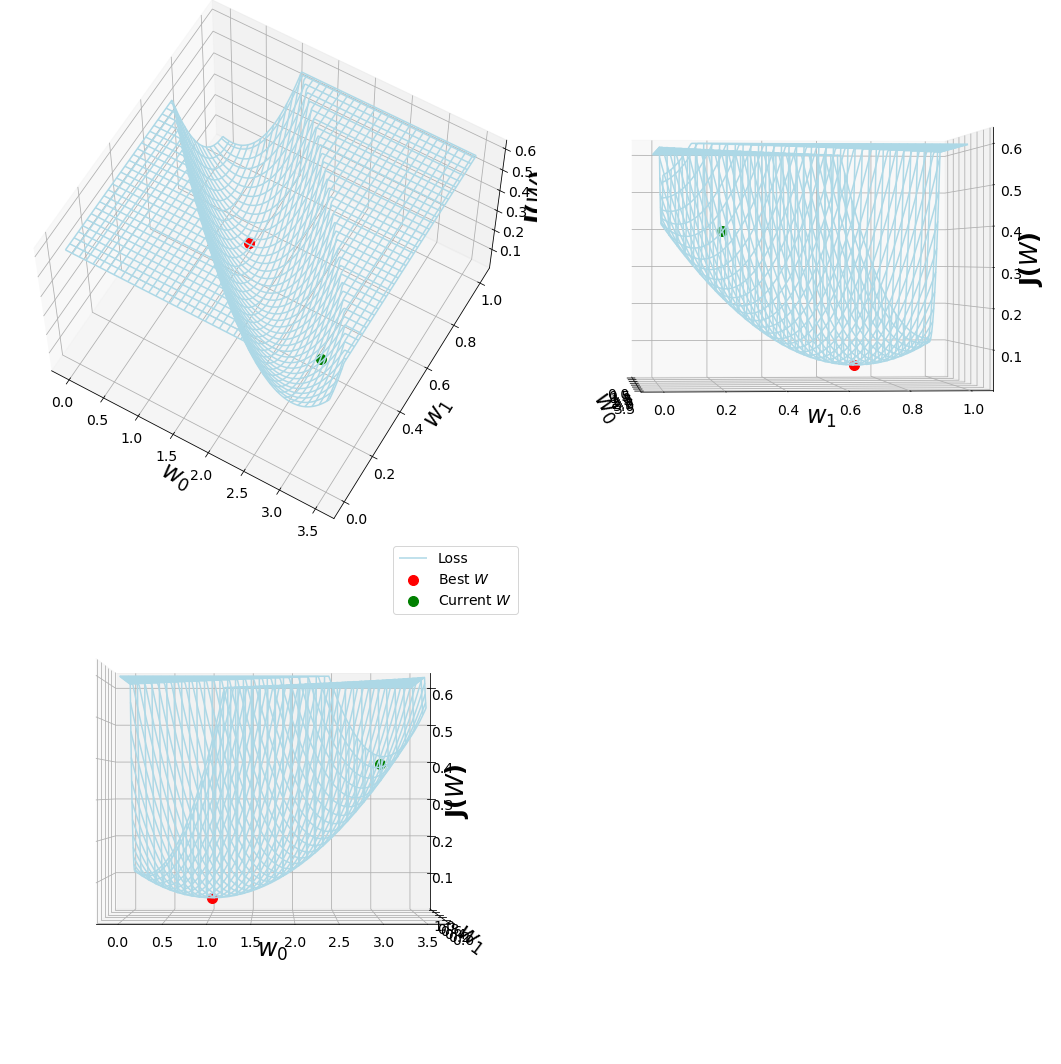

In [31]:
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d

side_sz = 300

w0_vals = np.linspace(0, 3.5, side_sz)
w1_vals = np.linspace(0, 1, side_sz)

X = X_data
y_true = y_data

Z_MAX = 0.6

losses = np.ndarray((side_sz, side_sz))
for j in range(len(w1_vals)):
    w1 = w1_vals[j]
    for i in range(len(w0_vals)):
        w0 = w0_vals[i]
        
        render_W = np.array([w0, w1])
        y_pred = predict(X, render_W)

        loss = loss_function(y_true, y_pred)
        loss = np.clip(loss, 0, Z_MAX)
        losses[j, i] = loss

y_pred = predict(X, np.array(real_W))
real_point_loss = loss_function(y_true, y_pred)

y_pred = predict(X, selected_W)
current_point_loss = loss_function(y_true, y_pred)

fig = plt.figure(figsize=[15,15])
views = [
    # Subplot code, (around X, around Z)
    (221, (60, -60)),
    (222, (0, -5)),
    (223, (0, -90)),
]

ww0, ww1 = np.meshgrid(w0_vals, w1_vals)

for view in views:
    ax = fig.add_subplot(view[0], projection='3d')
    ax.plot_wireframe(
        ww0, 
        ww1, 
        losses, 
        color='lightblue', 
        rstride=8, 
        cstride=8, 
        label='Loss',
        cmap=cm.coolwarm,
    )

    ax.scatter(
        xs = [real_W[0]],
        ys = [real_W[1]],
        zs = [real_point_loss],
        color='r',
        label='Best $W$',
        s=100
    )

    ax.scatter(
        xs = [selected_W[0]],
        ys = [selected_W[1]],
        zs = [current_point_loss],
        color='g',
        label='Current $W$',
        s=100
    )

    ax.view_init(*view[1])
    
    font = {
        'color': 'black',
        'weight': 'bold',
        'size': 24,
    }
    ax.set_xlabel('$w_0$', fontdict=font)
    ax.set_ylabel('$w_1$', fontdict=font)
    ax.set_zlabel('J($W$)', fontdict=font)
    
    # ax.tick_params(axis='x', colors='black')
    # ax.tick_params(axis='y', colors='black')
    # ax.tick_params(axis='z', colors='black')

plt.legend()

plt.tight_layout()
plt.show()

Давайте теперь для упрощения глянем на двумерный график, если 3D был сложен для понимания:

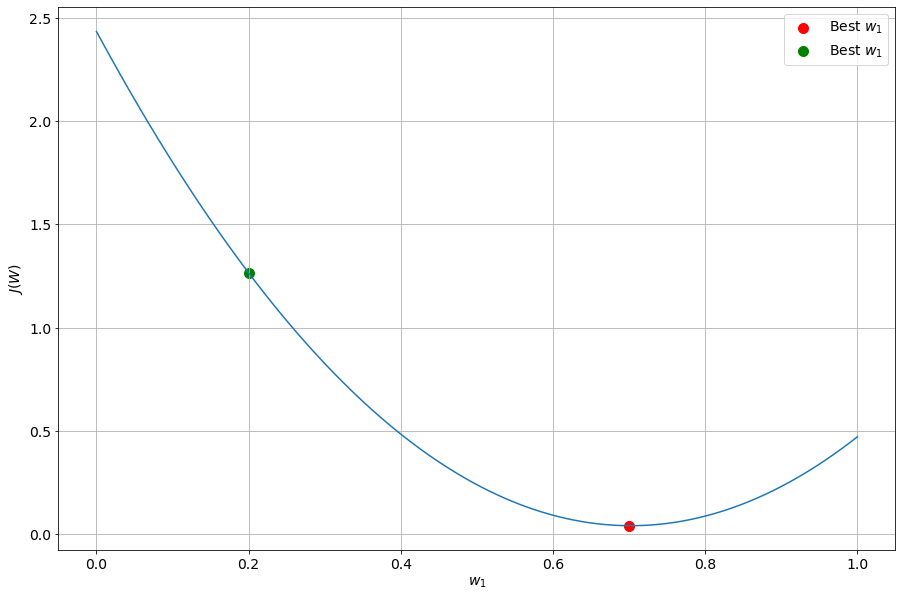

In [ ]:
w1 = np.linspace(0, 1, 100)
w0 = real_W[0]

X = X_data
y_true = y_data

losses = []

for w1_val in w1:
    render_W = np.array([w0, w1_val])
    y_pred = predict(X, render_W)

    loss = loss_function(y_true, y_pred)
    # loss = np.clip(loss, 0, Z_MAX)
    losses.append(loss)

losses = np.array(losses)

plt.plot(w1, losses)

# Render best point
y_pred = predict(X, np.array([w0, real_W[1]]))
best_loss = loss_function(y_true, y_pred)
plt.scatter([real_W[1]], [best_loss], color='r', s=100, label='Best $w_1$')

# Render selected point
y_pred = predict(X, np.array([w0, selected_W[1]]))
selected_loss = loss_function(y_true, y_pred)
plt.scatter([selected_W[1]], [selected_loss], color='g', s=100, label='Best $w_1$')

plt.grid(True)
plt.legend()

plt.xlabel('$w_1$')
plt.ylabel('$J(W)$')

plt.show()

# Градиентный спуск¶

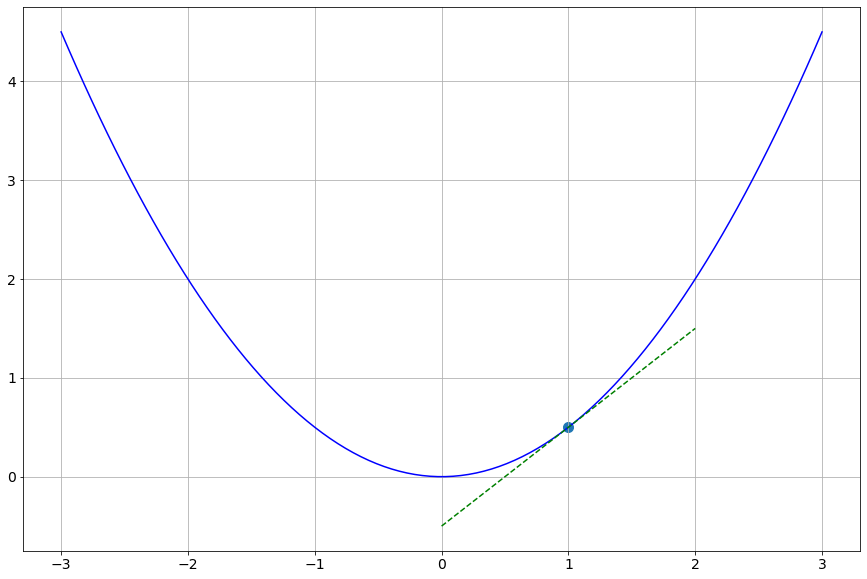

In [32]:
x = np.linspace(-3, 3, 100)
y = 0.5*x**2

x_grad = np.linspace(0, 2, 100)
y_grad = x_grad-0.5

plt.plot(x, y, 'b')
plt.plot(x_grad, y_grad, 'g--')
plt.scatter([1], [0.5], s=100)
plt.grid(True)
plt.show()

In [33]:
def loss_function_deriv_w0(X, W, y_true):
    # TODO - код расчета производной для смещения
    X1=np.concatenate((np.ones((X.shape[0],1),int),X),axis=1)
    loss_deriv_w0=np.sum(X1@W-y_true)/y_true.shape[0]
    return loss_deriv_w0

def loss_function_deriv_w1(X, W, y_true):
    # TODO - код расчета производной для веса признака 1
    X1=np.concatenate((np.ones((X.shape[0],1),int),X),axis=1)
    loss_deriv_w1=np.sum((X1@W-y_true)@X)/y_true.shape[0]
    return loss_deriv_w1


In [34]:
# TEST
X = np.array([
    [1],
    [4],
])
W = np.array([1, 2])
y_true = np.array([1, 3])

dJ_w0 = loss_function_deriv_w0(X, W, y_true)
dJ_w1 = loss_function_deriv_w1(X, W, y_true)
X
assert dJ_w1 == 13
assert dJ_w0 == 4

In [35]:
# Посмотрим на данных
y_true = y_data
X = X_data

dJ_w0 = loss_function_deriv_w0(X, selected_W, y_true)
dJ_w1 = loss_function_deriv_w1(X, selected_W, y_true)

In [36]:
dJ_w1, dJ_w0

(0.8902676036763331, 0.5618067900885585)

In [37]:
# Alpha - learning rate (lr)
lr = 0.01
n_iterations = 1000
# Создаем вектор весов с размерностью количества признаков + 1
new_W = np.zeros(X.shape[1]+1)
loss_history = []

for i_iter in range(n_iterations):
    dJ_w0 = loss_function_deriv_w0(X, new_W, y_true)
    dJ_w1 = loss_function_deriv_w1(X, new_W, y_true)
    new1=new_W[0]-dJ_w0*lr
    new2=new_W[1]-dJ_w1*lr
    new_W=[new1,new2]
    y_pred = predict(X, new_W)
    loss = loss_function(y_true, y_pred)
    loss_history.append(loss)

In [38]:
assert np.all(np.isclose(new_W, np.array([0.76555, 0.77251])))


In [39]:
def show_loss(loss_history):
    plt.plot(loss_history)
    plt.grid()
    plt.title('Loss history')
    plt.xlabel('Iteration')
    plt.ylabel('$J(X)$')
    plt.show()

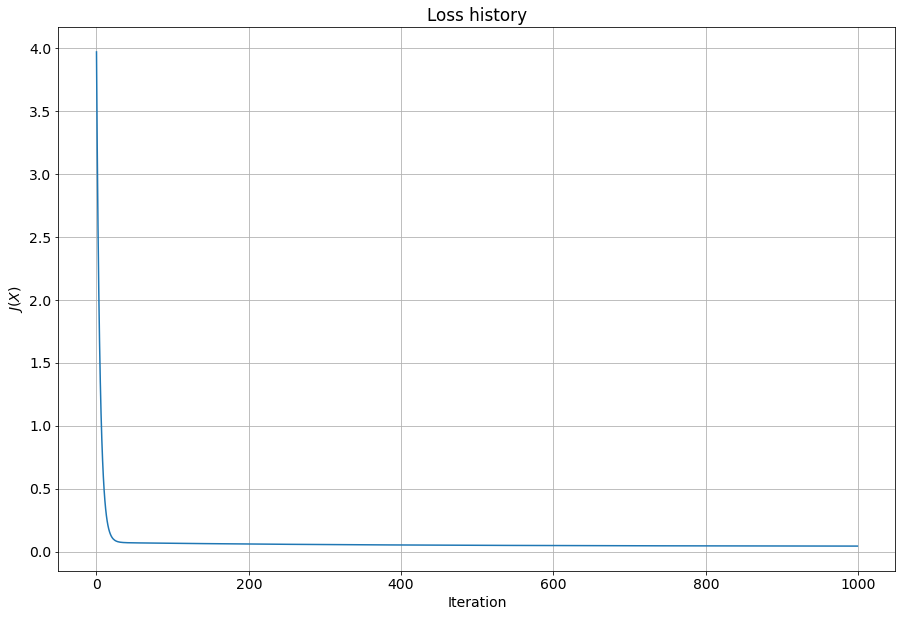

In [40]:
show_loss(loss_history)

In [41]:
new_W

[0.7655567074176559, 0.7725109234230839]

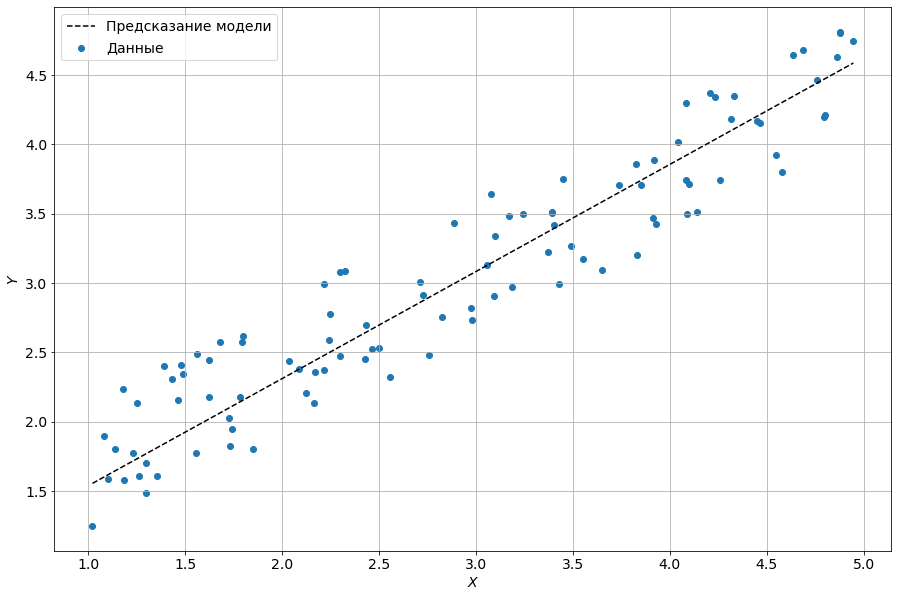

0.2983705528887494

In [42]:
y_pred = predict(X, new_W)
plot_model(X_data, y_pred, y_data)

rmse_value = rmse_score(y_true, y_pred)
rmse_value

Метрика $RMSE$ стала меньше, не так ли? Это отличный показатель того, что обученная модель работает лучше, чем с какими-то случайными весами!

# Больше визуализации результатов!¶

E:\jupytttt\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


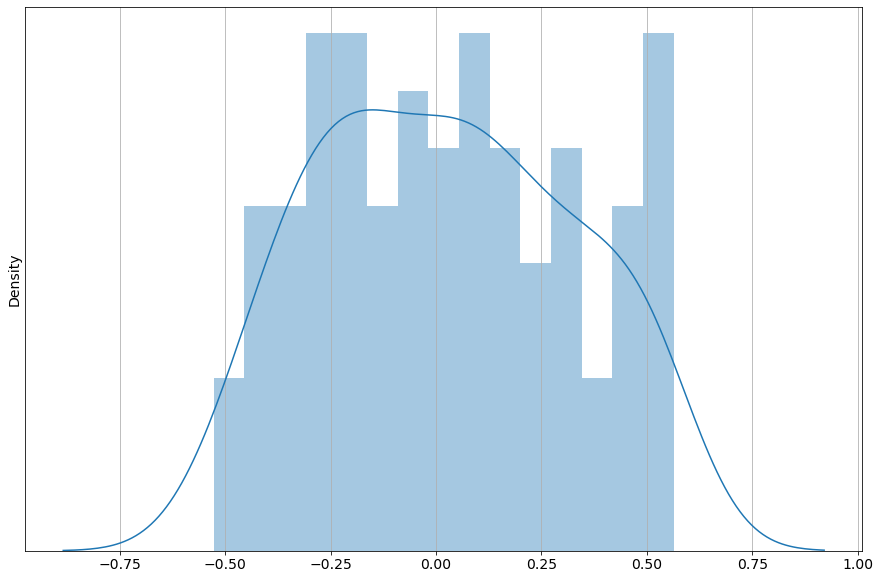

In [43]:
y_residuals = y_true-y_pred

sns.distplot(y_residuals, bins=15)
plt.yticks([])
plt.grid(True)
plt.show()

E:\jupytttt\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


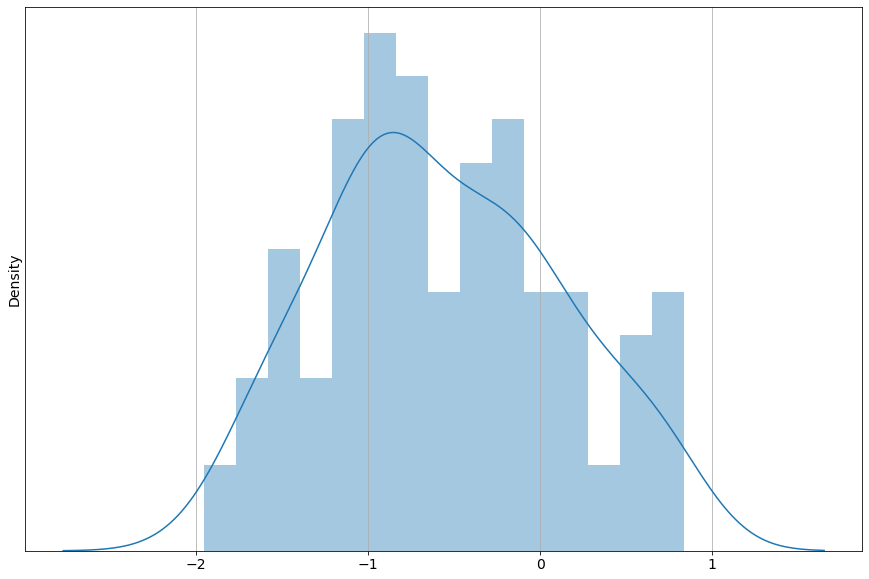

In [44]:
y_residuals = y_true-predict(X, selected_W)

sns.distplot(y_residuals, bins=15)
plt.yticks([])
plt.grid(True)
plt.show()

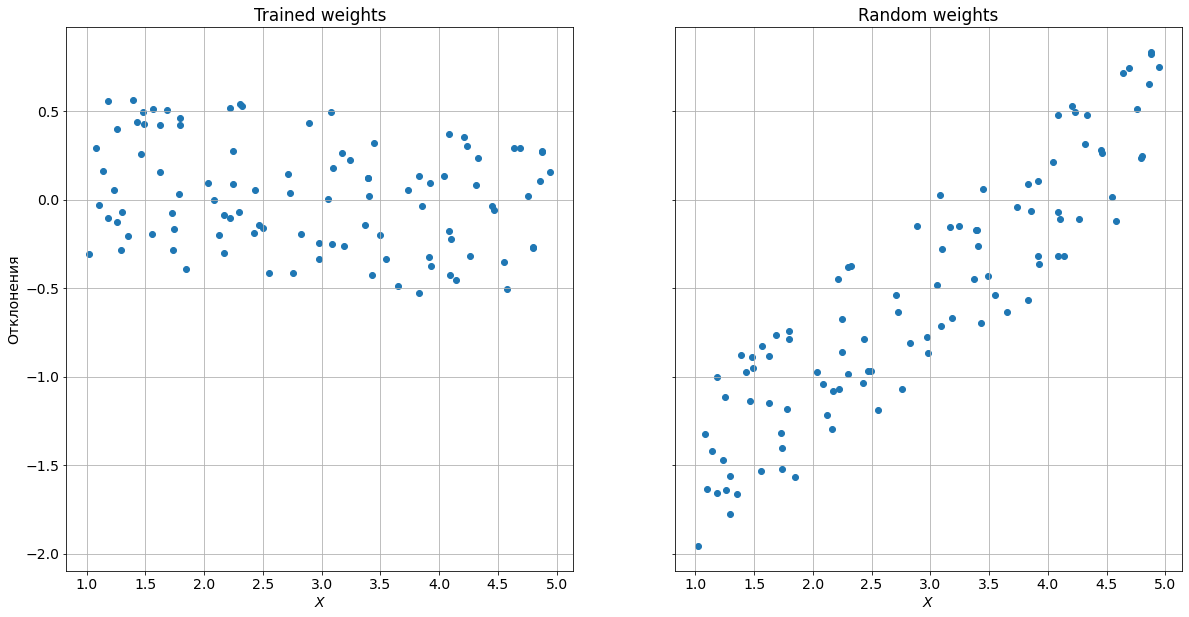

In [46]:
_, ax = plt.subplots(1, 2, sharey=True, figsize=[20, 10])

y_pred = predict(X, new_W)
ax[0].scatter(X, y_true-y_pred)
ax[0].grid(True)
ax[0].set_title('Trained weights')
ax[0].set_xlabel('$X$')
ax[0].set_ylabel('Отклонения')
y_pred = predict(X, selected_W)
ax[1].scatter(X, y_true-y_pred)
ax[1].grid(True)
ax[1].set_title('Random weights')
ax[1].set_xlabel('$X$')

plt.show()

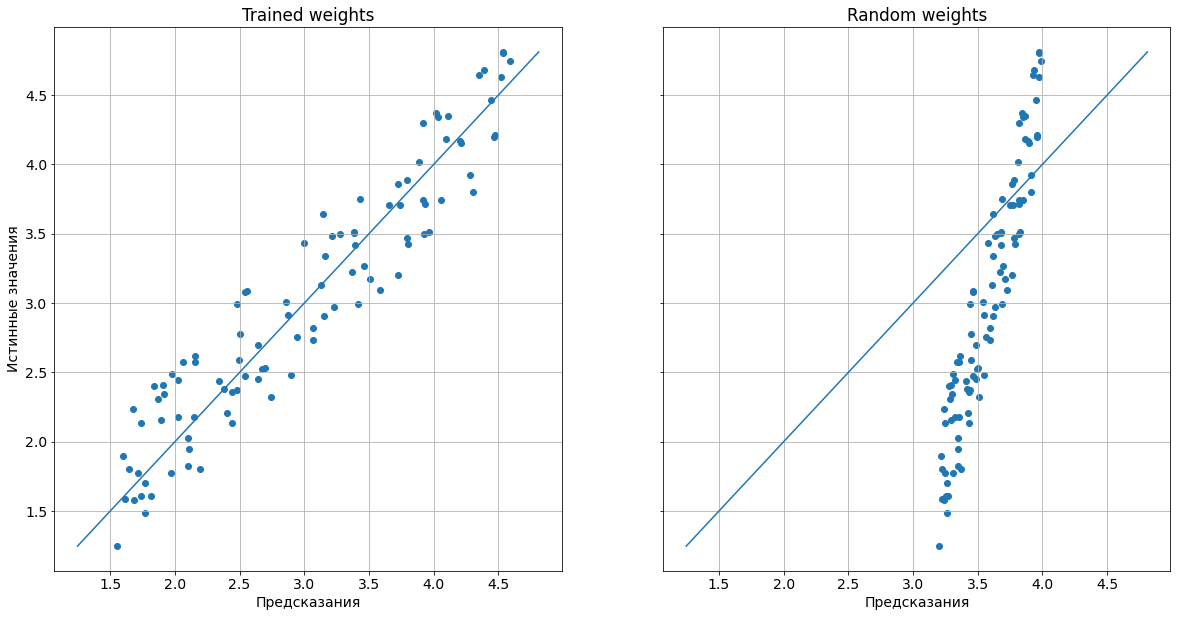

In [47]:
_, ax = plt.subplots(1, 2, sharey=True, figsize=[20, 10])

y_diag = np.sort(y_true)

y_pred = predict(X, new_W)
ax[0].plot(y_diag, y_diag)
ax[0].scatter(y_pred, y_true)
ax[0].grid(True)
ax[0].set_title('Trained weights')
ax[0].set_ylabel('Истинные значения')
ax[0].set_xlabel('Предсказания')

y_pred = predict(X, selected_W)
ax[1].plot(y_diag, y_diag)
ax[1].scatter(y_pred, y_true)
ax[1].grid(True)
ax[1].set_title('Random weights')
ax[1].set_xlabel('Предсказания')

plt.show()

Самое время провести реализацию выведенных законов!

In [48]:
def loss_function_deriv(X, W, y_true):
    X1=np.concatenate((np.ones((X.shape[0],1),int),X),axis=1)
    loss_deriv=(np.sum(X1.T*(X1@W-y_true),axis=1))/len(y_true)
    return loss_deriv

In [49]:
# TEST
X = np.array([
    [1, 3],
    [4, 2],
])
W = np.array([1, 1, 2])
y_true = np.array([1, 3])
dJ = loss_function_deriv(X, W, y_true)
dJ_true = np.array([6.5, 15.5, 16.5])
assert np.all(dJ == dJ_true)
assert np.all(dJ.shape == dJ_true.shape)

In [50]:
def fit_model(lr, n_iter, X, y):
    new_W = np.zeros(X.shape[1]+1)
    loss_history = []
    print(f'Data shape: {X.shape}')
    print(f'Start weights: {new_W}')

    for i_iter in range(n_iter):
        dJ=loss_function_deriv(X,new_W,y)
        new_W=new_W-dJ*lr
        y_pred = predict(X, new_W)
        loss = loss_function(y, y_pred)
        loss_history.append(loss)

    print(f'Result weights: {new_W}')
    return new_W, loss_history

In [51]:
new_W, loss_history = fit_model(
    lr=0.01,
    n_iter=1000,
    X=X_data,
    y=y_data
)

Data shape: (100, 1)
Start weights: [0. 0.]
Result weights: [0.76555671 0.77251092]


In [52]:
assert np.all(np.isclose(new_W, np.array([0.76555, 0.77251])))


# Задание
Изучите, как влияет значение lr на скорость сходимости - проверьте значения: [1, 0.1, 0.01, 0.001, 1e-4], отобразите графики функции потерь и предсказания модели, сделайте выводы.

Data shape: (100, 1)
Start weights: [0. 0.]
Result weights: [0.94188948 0.71941946]
Data shape: (100, 1)
Start weights: [0. 0.]
Result weights: [0.76555671 0.77251092]
Data shape: (100, 1)
Start weights: [0. 0.]
Result weights: [0.35950346 0.89474377]
Data shape: (100, 1)
Start weights: [0. 0.]
Result weights: [0.18946813 0.59753725]


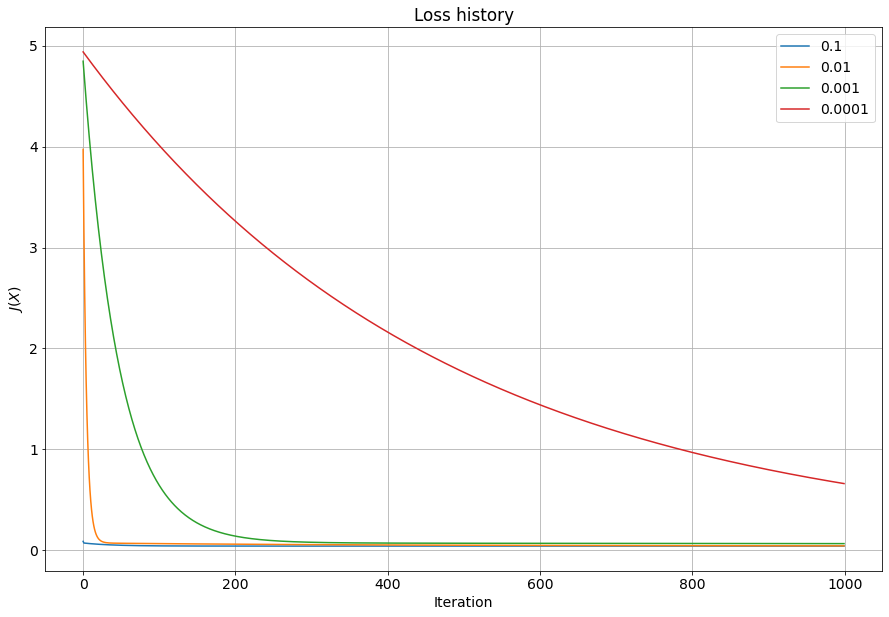

Data shape: (100, 1)
Start weights: [0. 0.]
Result weights: [0.94188948 0.71941946]


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 3)

In [54]:
# TODO - обучите модели при разных коэффициентах обучения 
#           и отобразите графики истории


for lr1 in np.array([0.1, 0.01, 0.001, 0.0001]):
    new_W, loss_history = fit_model(
    lr=lr1,
    n_iter=1000,
    X=X_data,
    y=y_data
)
    plt.plot(loss_history)
plt.grid()
plt.legend(['0.1','0.01','0.001','0.0001'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('$J(X)$')
plt.show()

for lr1 in np.array([0.1,0.01,0.001,0.0001]):
    new_W, loss_history = fit_model(
        lr=lr1,
        n_iter=1000,
        X=X_data,
        y=y_data
    )
    
    y_diag = np.sort(y_data)
    y_pred = predict(X, new_W)
    plt.plot(y_diag, y_diag)
    plt.scatter(y_data, y_pred)

        
plt.legend(['0.1','0.01','0.001','0.0001'])
plt.title('Trained weights')
plt.grid()

# Полиномиальная регрессия

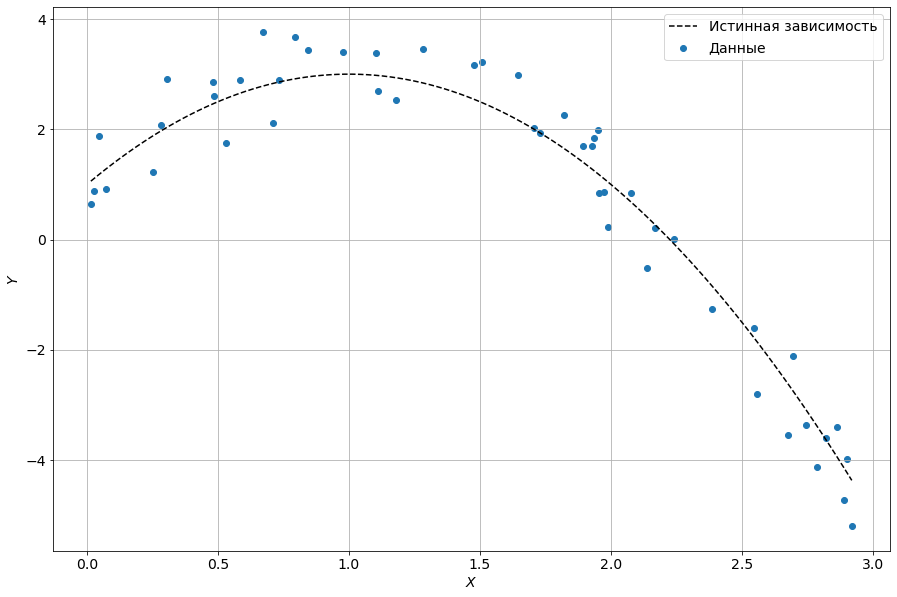

In [56]:
n_points = 50

real_W = [1, 4, -2]
X_data = 3*np.sort(np.random.rand(n_points, 1), axis=0)
noize = 2*(np.random.rand(n_points, 1)-0.5)
y_data_true = real_W[0] + real_W[1]*X_data + real_W[2]*X_data**2
y_data_noized = y_data_true + noize
y_data = y_data_noized[:, 0]

X_render = np.linspace(X_data.min(), X_data.max(), 100)
y_render = real_W[0] + real_W[1]*X_render + real_W[2]*X_render**2

plt.scatter(X_data, y_data_noized, label='Данные')
plt.plot(X_render, y_render, 'k--', label='Истинная зависимость')
plt.ylabel('$Y$')
plt.xlabel('$X$')
plt.grid()
plt.legend()

In [57]:
def generate_polynomial_features(X, degree):
    X_poly=X
    for i in range (degree-1):
        X_poly=np.concatenate((X_poly,X**(i+2)),axis=1)
    return X_poly
# TODO - код генерации полиномиальных признаков
    #           из вектора X

In [58]:
# TEST
X = np.array([
    [1],
    [2],
    [3],
])
X_poly = generate_polynomial_features(X, degree=2)
assert np.all(X_poly == np.array([[1, 1], [2, 4], [3, 9]]))

In [59]:
X_poly = generate_polynomial_features(X_data, degree=2)


In [60]:
# Задаем примерные начальные веса
selected_W = np.array([1.1, 1.2, 1.3])
X = generate_polynomial_features(X_data, degree=2)
y_true = y_data

# Проверяем предикт
y_pred = predict(X, selected_W)

y_pred.shape, y_pred.shape[0] == X_data.shape[0]

((50,), True)

In [61]:
# Проверяем показатель метрики
rmse_value = rmse_score(y_true, y_pred)

rmse_value

9.54122425719995

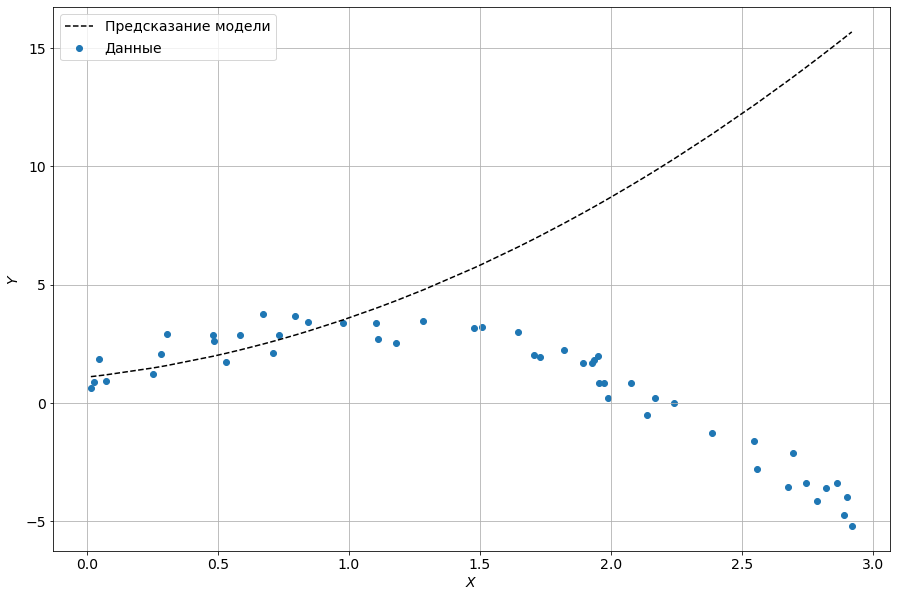

In [ ]:
plot_model(X_data, y_pred, y_data)


Data shape: (50, 2)
Start weights: [0. 0. 0.]
Result weights: [ 1.79060588  3.02760564 -1.75710417]


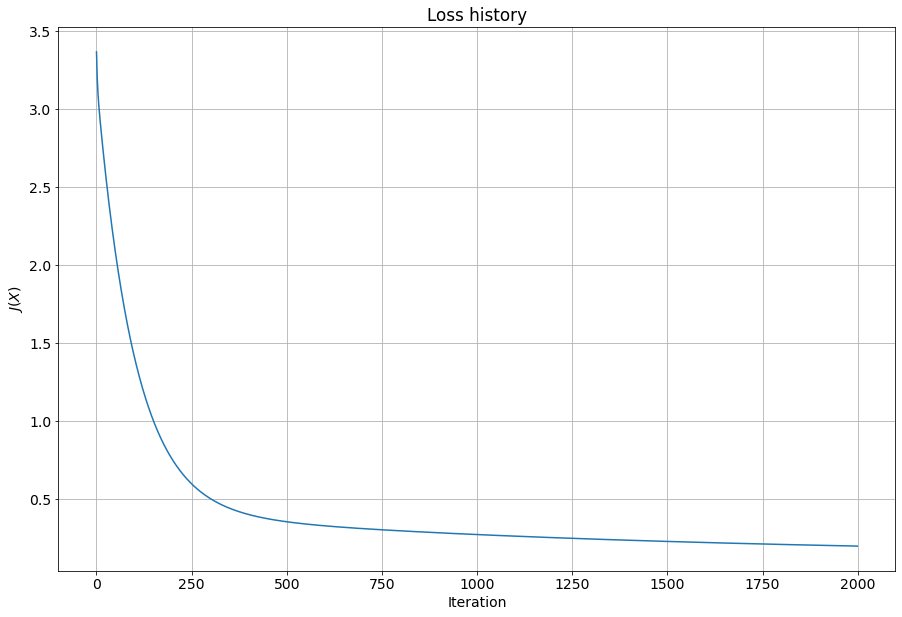

In [62]:
new_W, loss_history = fit_model(
    lr=0.01,
    n_iter=2000,
    X=X,
    y=y_data
)

show_loss(loss_history)

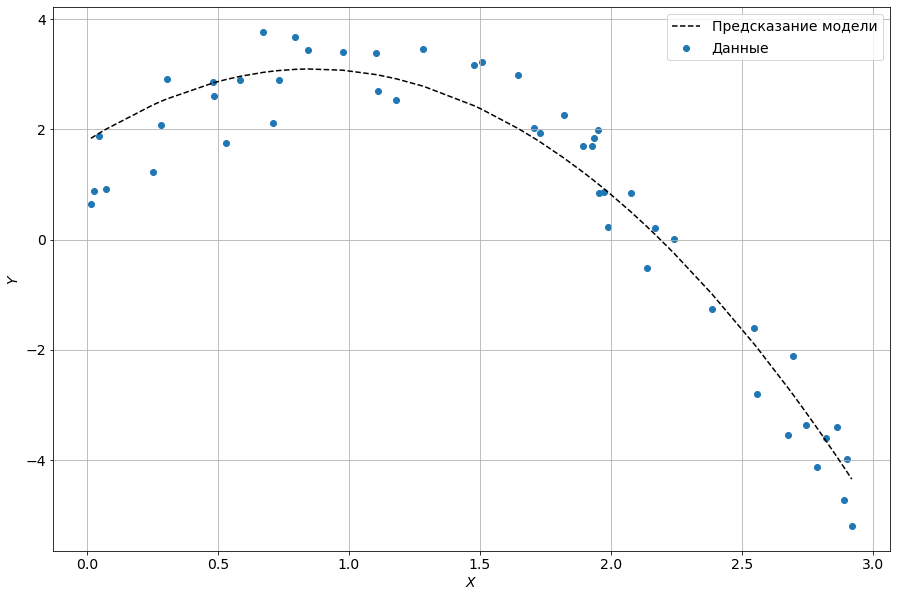

0.6299511551354811

In [63]:
y_pred = predict(X, new_W)
plot_model(X_data, y_pred, y_true)
rmse_score(y_true, y_pred)

# Underfit (high bias)¶

Data shape: (50, 1)
Start weights: [0. 0.]
Result weights: [ 3.9101159  -2.04843436]


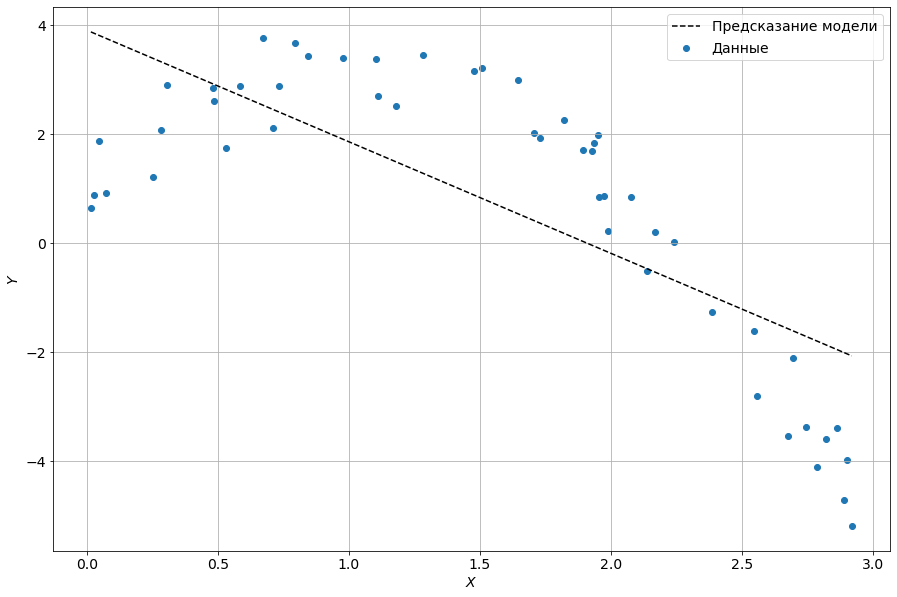

In [ ]:
DEGREE=1
X = generate_polynomial_features(X_data, degree=DEGREE)
y_true = y_data

new_W, loss_history = fit_model(
    lr=0.01,
    n_iter=2000,
    X=X,
    y=y_data
)

y_pred = predict(X, new_W)
plot_model(X_data, y_pred, y_data)

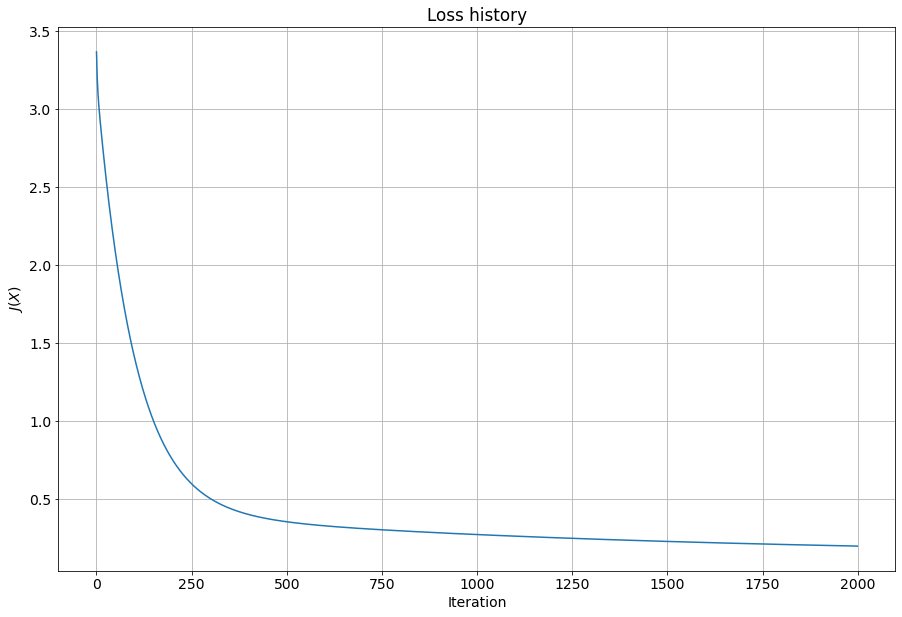

In [64]:
show_loss(loss_history)


# R2 метрика (коэффициент детерминации)¶

In [65]:
def r2_score(y_true, y_pred):
    # TODO - код расчета R-squared
    y_sr=sum(y_true)/len(y_true)
    SStot=sum((y_true-y_sr)**2)
    SSres=sum((y_true-y_pred)**2)
    r2_value=1-(SSres/SStot)
    return r2_value

In [66]:
# TEST
y_true = np.array([0.5, 0.1, -0.4, 1.2])
y_pred = np.array([0.2, 0.0, -0.1, 3.1])

r2_value = r2_score(y_true, y_pred)

assert np.isclose(r2_value, -1.773722)

In [67]:

y_true = y_data
y_pred = predict(X, new_W)
r2_value = r2_score(y_true, y_pred)

r2_value, r2_value > 0

(0.938639602053697, True)

# Задание¶
Произведите обучение модели второго порядка и оцените коэффициент детерминации.

In [68]:
DEGREE=2
X = generate_polynomial_features(X_data, degree=DEGREE)
y_true = y_data

new_W, loss_history = fit_model(
    lr=0.01,
    n_iter=3000,
    X=X,
    y=y_data
)
y_true = y_data
y_pred = predict(X, new_W)
r2_value = r2_score(y_true, y_pred)
r2_value, r2_value > 0

Data shape: (50, 2)
Start weights: [0. 0. 0.]
Result weights: [ 1.51020269  3.512052   -1.90540432]


(0.9491372464948639, True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


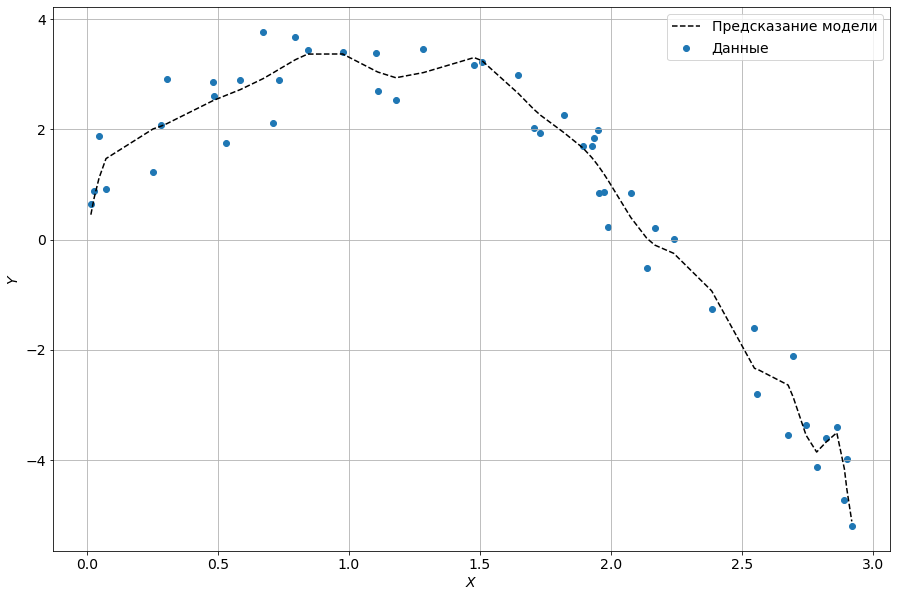

(0.47155692061158905, 0.9656170876432901)

In [ ]:
DEGREE=25
X = generate_polynomial_features(X_data, degree=DEGREE)
y = y_data

def fit_model_least_square(X, y):
    coef_, _residues, rank_, singular_ = np.linalg.lstsq(X, y)
    coef_ = np.insert(coef_, 0, 0)
    new_W = np.array(coef_)

    return new_W

new_W = fit_model_least_square(X, y)

y_pred = predict(X, new_W)
plot_model(X_data, y_pred, y_data)
rmse_score(y_true, y_pred), r2_score(y_true, y_pred)

In [69]:
DATA_COUNT=X_data.shape[0]
# np.random.permutation() - функция перемешивания данных 
#   в переданном массиве
data_indexes=np.random.permutation(range(DATA_COUNT))

# 70% данных уходит на обучение
TRAIN_COUNT=int(DATA_COUNT*0.7)
train_indexes=data_indexes[:TRAIN_COUNT]
test_indexes=data_indexes[TRAIN_COUNT:]

X_train = X_data[train_indexes]
y_train = y_data[train_indexes]
X_test = X_data[test_indexes]
y_test = y_data[test_indexes]

X_train = generate_polynomial_features(X_train, degree=DEGREE)
X_test = generate_polynomial_features(X_test, degree=DEGREE)

In [ ]:
new_W = fit_model_least_square(X_train, y_train)

y_pred = predict(X_test, new_W)
test_mse = rmse_score(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

y_pred = predict(X_train, new_W)
train_mse = rmse_score(y_train, y_pred)
train_r2 = r2_score(y_train, y_pred)

print(f'Train MSE: {train_mse} / R2: {train_r2}')
print(f'Test MSE: {test_mse} / R2: {test_r2}')

Train MSE: 0.39051656259975515 / R2: 0.9673349482797522
Test MSE: 4.092185521835706 / R2: -0.8150447984222535


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


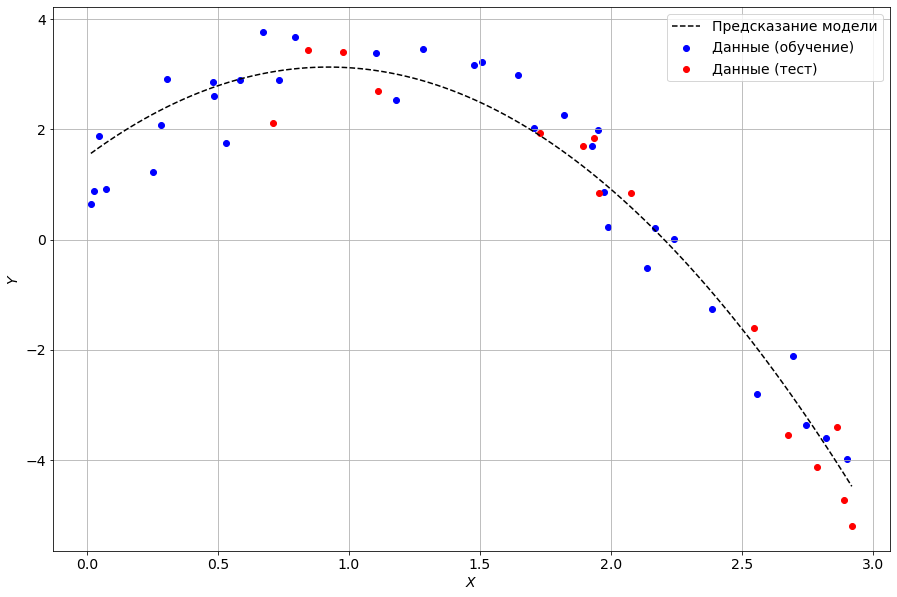

In [70]:

X_min = X_data[:,0].min()
X_max = X_data[:,0].max()

X_render = np.linspace(X_min, X_max, 100).reshape(-1, 1)
# Добавим генерацию полиномиальных признаков
X_render = generate_polynomial_features(X_render, DEGREE)
y_render = predict(X_render, new_W)

plt.scatter(X_train[:,0], y_train, color='blue', label='Данные (обучение)')
plt.scatter(X_test[:,0], y_test, color='red', label='Данные (тест)')
plt.plot(X_render[:,0], y_render, 'k--', label='Предсказание модели')
plt.ylabel('$Y$')
plt.xlabel('$X$')
plt.grid()
plt.legend()
plt.show()

# Стандартизация/нормализация значений признаков¶

In [ ]:
DEGREE=7
X_poly = generate_polynomial_features(X_data, degree=DEGREE)

In [71]:
X = X_poly
y_true = y_data

new_W, loss_history = fit_model(
    lr=0.01,
    n_iter=2000,
    X=X,
    y=y_true
)

Data shape: (50, 2)
Start weights: [0. 0. 0.]
Result weights: [ 1.79060588  3.02760564 -1.75710417]


In [72]:
start_W = np.zeros(DEGREE+1)
dJ = loss_function_deriv(X, start_W, y_true)
print(dJ)

[-0.75150704  0.58934151  3.94164214]


Data shape: (50, 2)
Start weights: [0. 0. 0.]
Result weights: [ 0.00152846 -0.00111877 -0.00773564]


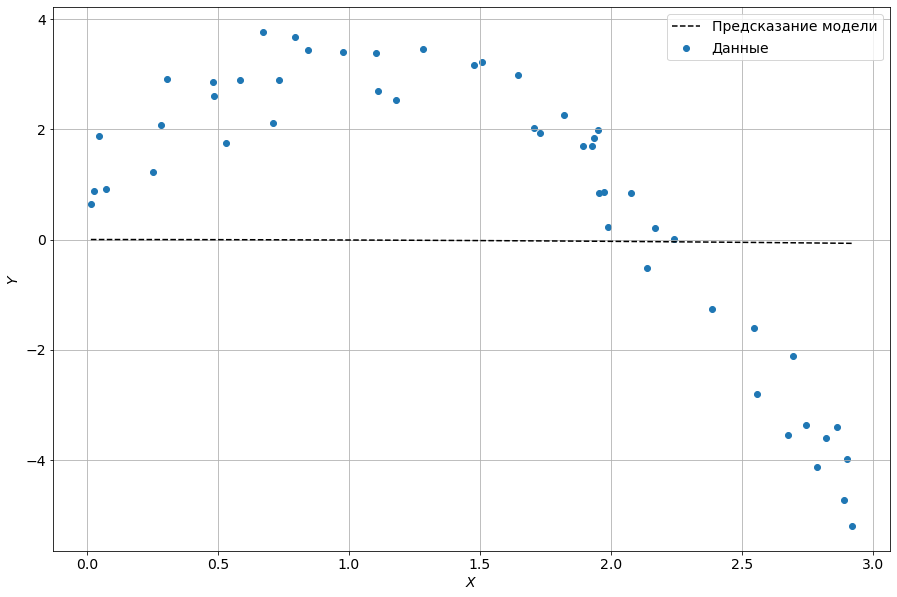

In [73]:
new_W, loss_history = fit_model(
    lr=1e-6,
    n_iter=2000,
    X=X,
    y=y_true
)
y_pred = predict(X, new_W)
plot_model(X_data, y_pred, y_data)

In [76]:
def standardize_features_scale(X):
    X_mean=np.mean(X,axis=0)
    X_std=np.std(X,axis=0)
    X_scaled=(X-X_mean)/X_std
    return X_scaled
    # TODO - код для стандартизации


In [77]:
# TEST
X = np.arange(2, 10).reshape(4, 2)

X_scaled = standardize_features_scale(X)

# Cтандартизированные данные должны иметь нулевое среднее и единичное стандартное отклонение
assert np.all(np.isclose(X_scaled.mean(axis=0), 0))
assert np.all(np.isclose(X_scaled.std(axis=0), 1))

assert np.all(
    np.isclose(
        X_scaled, 
        np.array([[-1.34164079, -1.34164079],
                  [-0.4472136 , -0.4472136 ],
                  [ 0.4472136 ,  0.4472136 ],
                  [ 1.34164079,  1.34164079]])
    )
)

In [78]:
X_poly_scaled = standardize_features_scale(X_poly)
y_true = y_data
start_W = np.zeros(DEGREE+1)

dJ = loss_function_deriv(X_poly_scaled, start_W, y_true)
print(dJ)

[-0.75150704  1.90912685  2.25280109]


Data shape: (50, 2)
Start weights: [0. 0. 0.]
Result weights: [ 0.75150704  1.45971029 -3.57551543]


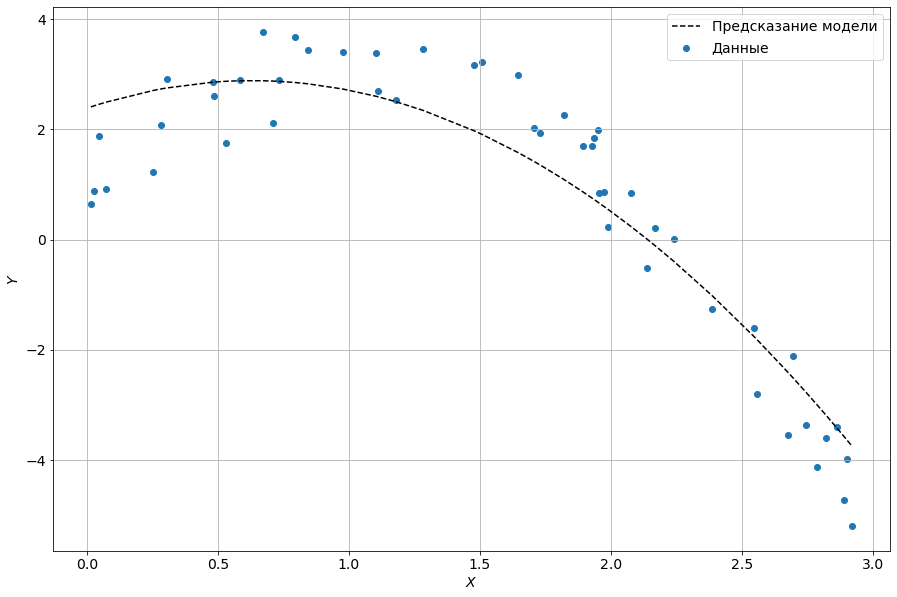

0.8838091769157088

In [79]:
new_W, loss_history = fit_model(
    lr=0.01,
    n_iter=2000,
    X=X_poly_scaled,
    y=y_true
)
y_pred = predict(X_poly_scaled, new_W)
plot_model(X_data, y_pred, y_data)
r2_score(y_true, y_pred)

# Задание
Реализуйте и проверьте работоспособность стандартизации минмакс:$$
X_{standardized}=\frac{X-X_{min}}{X_{max}-X_{min}}
$$

In [80]:
def minmax_feature_scale(X):
    X_min=np.min(X,axis=0)
    X_max=np.max(X,axis=0)
    X_scaled=(X-X_min)/(X_max-X_min)
    return X_scaled
    # TODO - код масштабирования по принципу minmax


In [81]:
# TEST
X = np.arange(2, 10).reshape(4, 2)

X_scaled = minmax_feature_scale(X)

assert np.all(
    np.isclose(
        X_scaled, 
        np.array([[0.        , 0.        ],
                  [0.33333333, 0.33333333],
                  [0.66666667, 0.66666667],
                  [1.        , 1.        ]])
    )
)

[-0.75150704  0.20688176  0.46262641]
Data shape: (50, 2)
Start weights: [0. 0. 0.]
Result weights: [ 3.29913469 -1.64689642 -4.46891713]


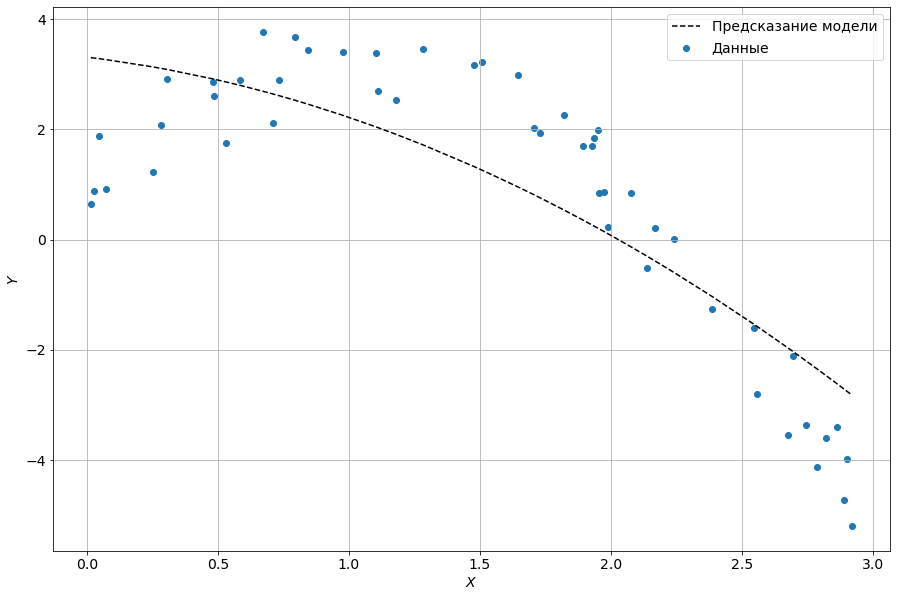

0.7277164145753101

In [82]:
X_poly_scaled = minmax_feature_scale(X_poly)
y_true = y_data
start_W = np.zeros(DEGREE+1)

dJ = loss_function_deriv(X_poly_scaled, start_W, y_true)
print(dJ)
new_W, loss_history = fit_model(
    lr=0.01,
    n_iter=2000,
    X=X_poly_scaled,
    y=y_true
)
y_pred = predict(X_poly_scaled, new_W)
plot_model(X_data, y_pred, y_data)
r2_score(y_true, y_pred)

# Стандартизация для линейной регрессии (важность признаков)

In [83]:
W = [2, 20]

X = np.random.uniform(low=0, high=[40, 1], size=(15, 2))
X[:, 0] = X[:, 0].astype(int)
y_true = np.clip(X.dot(W)+np.random.randn(15)*3, 0, 100)

df = pd.DataFrame(X[:,:2], columns=['tasks_completed', 'class_attended_rate'])
df['grade'] = y_true

df

,tasks_completed,class_attended_rate,grade
0,12.0,0.979511,45.094491
1,7.0,0.017161,17.525138
2,30.0,0.806913,74.131335
3,13.0,0.464674,32.689224
4,25.0,0.048059,49.326066
5,37.0,0.886680,87.931461
6,10.0,0.015305,20.636990
7,37.0,0.501040,82.730722
8,21.0,0.683964,59.369909
9,24.0,0.943892,63.004159


In [84]:
y_pred = X.dot(W)
r2_score(y_true, y_pred)

0.9826541062331413

In [85]:
X_scaled = standardize_features_scale(X)

new_W, _ = fit_model(
    lr=0.01,
    n_iter=3000,
    X=X_scaled,
    y=y_true
)

y_pred = predict(X_scaled, new_W)
new_W, r2_score(y_true, y_pred)

Data shape: (15, 2)
Start weights: [0. 0. 0.]
Result weights: [57.29326909 21.53810823  5.95366071]


(array([57.29326909, 21.53810823,  5.95366071]), 0.9832343246501896)